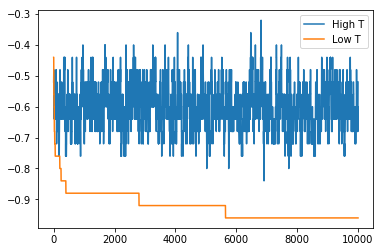

In [1]:
# The purpose of this assignment is to develop data handling skills around statistical information.
# The two files are PE/N data from 1D MC simulations with N=25, V=50, at T=1.0 or T=0.1.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
def autocorr1D(array):
    '''Takes in a linear numpy array, performs autocorrelation
       function and returns normalized array with half the length 
       of the input'''
    ft = numpy.fft.rfft(array-numpy.average(array)) 
    acorr = numpy.fft.irfft(ft*numpy.conjugate(ft))/(len(array)*numpy.var(array))
    return acorr[0:len(acorr)//2]
u1 = numpy.loadtxt('1.0.txt')
u2 = numpy.loadtxt('0.1.txt')
fig, ax = plt.subplots()
ax.plot(u1,label="High T")
ax.plot(u2,label="Low T")
legend = ax.legend(loc="upper right")

In [3]:
#1. What are the means and standard deviations of these two datasets?
print("High T: {:0.3f} +/- {:0.3f}".format(numpy.average(u1),numpy.std(u1)))
print("Low T: {:0.3f} +/- {:0.3f}".format(numpy.average(u2),numpy.std(u2)))

High T: -0.602 +/- 0.068
Low T: -0.922 +/- 0.045


In [4]:
#2. How many statistically independent samples can we extract from each of these data sets?
ac1 = autocorr1D(u1)
ac2 = autocorr1D(u2)
dt1 = numpy.argwhere(ac1<0)[0][0] #the 0th element of argwhere is a list containing the index of the first element <0, so we use [0] of that to get the value itself
dt2 = numpy.argwhere(ac2<0)[0][0]
print("If we use the whole of each data set,\nwe get {} from the High T and {} from the Low T".format(len(u1)//dt1,len(u2)//dt2))

If we use the whole of each data set,
we get 238 from the High T and 4 from the Low T


In [5]:
#4. What are the means and standard deviations of the statistically independent subsets of these data sets?
print("High T: {:0.3f} +/- {:0.3f}".format(numpy.average(u1[::dt1]),numpy.std(u1[::-dt1])))
print("Low T: {:0.3f} +/- {:0.3f}".format(numpy.average(u2[::dt2]),numpy.std(u2[::-dt2])))
print("The fact that the stats changed for the Low T case after taking the independent subset is suspect!")

High T: -0.604 +/- 0.068
Low T: -0.832 +/- 0.030
The fact that the stats changed for the Low T case after taking the independent subset is suspect!


In [6]:
#5. You choose to either (a) Tell me the average potential energy of this system at T=1.0, or
#   (b) Tell me the average potential energy of this system at T=0.1. 
#   Either way, I'll go find the "real" potential energy, which was calculated by running for 
#   infinite time in both cases and compare it against what you tell me. The twist is, that you 
#   have to bet your life on not being off by more than 1%. Do you choose, (a) or (b), and why?

serr = numpy.std(u1[::-dt1])/numpy.sqrt(len(u1[::-dt1]))
print("Dividing the standard deviation by the sqrt of number of samples gives us standard error of the mean:\n{:0.3f}".format(serr))
rel_err = numpy.abs(100* serr/numpy.average(u1[::-dt1]))
print("Therefore the relative error ({:0.3f}%) is under 1%, so it's not a terrible bet to bet my life on that.".format(rel_err))
print("HOWEVER. Noticing that the final PE/N of the low T case is -24/25 tells me that all of the 25 particles\nhave stuck together, making this the lowest possible potential energy structure. So, at T=0.1, I am *certain* \nthat the average potential energy is -0.96: Removing one of the end particles and placing it in an empty spot with no\nneighbors will occur with p < exp(-1/0.1), or about 45 of every million attempts. So (b) is a bit better :)")

Dividing the standard deviation by the sqrt of number of samples gives us standard error of the mean:
0.004
Therefore the relative error (0.720%) is under 1%, so it's not a terrible bet to bet my life on that.
HOWEVER. Noticing that the final PE/N of the low T case is -24/25 tells me that all of the 25 particles
have stuck together, making this the lowest possible potential energy structure. So, at T=0.1, I am *certain* 
that the average potential energy is -0.96: Removing one of the end particles and placing it in an empty spot with no
neighbors will occur with p < exp(-1/0.1), or about 45 of every million attempts. So (b) is a bit better :)


In [3]:
4%5

4